In [1]:
import pickle

pickle_in = open("train_X.pickle", "rb")
train_X = pickle.load(pickle_in)

pickle_in = open("train_y.pickle", "rb")
train_y = pickle.load(pickle_in)

pickle_in = open("test_X.pickle", "rb")
test_X = pickle.load(pickle_in)

pickle_in = open("test_y.pickle", "rb")
test_y = pickle.load(pickle_in)



In [2]:
nsamples, nx, ny, nz = train_X.shape
train_X = train_X.reshape((nsamples,nx*ny*nz))

nsamples, nx, ny, nz = test_X.shape
test_X = test_X.reshape((nsamples,nx*ny*nz))

In [3]:
print("Dimension of Train set",train_X.shape)
print("Dimension of Test set",test_X.shape)

# Transforming non numerical labels into numerical labels
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

# encoding train labels 
encoder.fit(train_y)
train_y = encoder.transform(train_y)

# encoding test labels 
encoder.fit(test_y)
test_y = encoder.transform(test_y)


# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

Dimension of Train set (28821, 2304)
Dimension of Test set (7066, 2304)


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [4]:
print(train_X_scaled.shape)
print(test_X_scaled.shape)
print(train_X_scaled[0])
print(test_X_scaled[0])

(28821, 2304)
(7066, 2304)
[-0.57924465 -0.47759146 -0.41042641 ... -0.09669844 -0.0678996
 -0.4092468 ]
[-0.74939536 -0.62619647 -0.5489048  ... -1.38540578 -1.36011212
 -1.33551646]


In [ ]:
# #Libraries to Build Ensemble Model : Random Forest Classifier 
# # Create the parameter grid based on the results of random search 
# params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
#                      'C': [1, 10, 100, 1000]},
#                     {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
# Performing CV to tune parameters for best SVM fit 
# svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model = SVC()
svm_model.fit(train_X_scaled, train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
pred_y = svm_model.predict(test_X_scaled)
pred_y_label = list(encoder.inverse_transform(pred_y))

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [13]:
print(confusion_matrix(test_y , pred_y_label))

[[ 211    0   67  290  142  205   45]
 [  12    4   13   41   17   20    4]
 [  74    0  258  237  148  219   82]
 [  62    0   52 1356  138  184   33]
 [  62    0   56  313  530  217   38]
 [  69    0   79  280  192  492   27]
 [  25    0   61  145   87   62  417]]


In [14]:
cnf_matrix = confusion_matrix(test_y , pred_y_label)

In [21]:
import numpy as np
for row in cnf_matrix:
    print(np.sum(row))


960
111
1018
1825
1216
1139
797


In [23]:
import os
base_path = "./images/images/"
# check the number of pictures
for expression in os.listdir(base_path + "validation"):
    print(str(len(os.listdir(base_path + "validation/" + expression))) + " " + expression + " images")

960 angry images
111 disgust images
1018 fear images
1825 happy images
1216 neutral images
1139 sad images
797 surprise images


<Figure size 432x288 with 0 Axes>

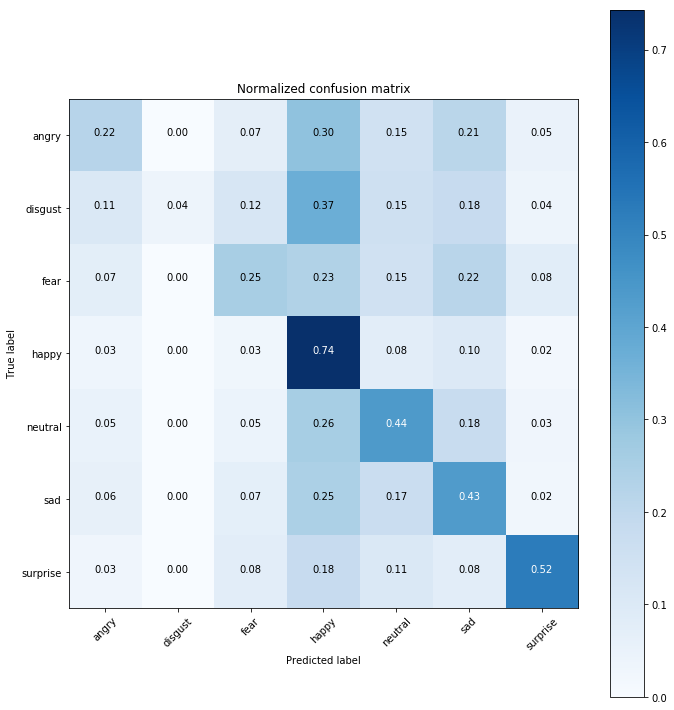

In [26]:
# show the confusion matrix of our predictions
import itertools
import matplotlib.pyplot as plt
class_names = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

(48, 48)


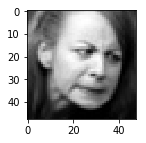

[[58 66 70 ... 51 47 35]
 [62 64 73 ... 59 51 42]
 [66 69 87 ... 58 54 53]
 ...
 [ 8 15 19 ...  5  7  8]
 [ 6 14 17 ...  4  7 10]
 [ 8 15 20 ...  5  7  9]]


In [43]:
import cv2
os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"
base_path = "./images/images/"
pic_size = 48
plt.figure(0, figsize=(2,2))
for expression in os.listdir(base_path + "validation/"):    
    img = cv2.imread(base_path + "validation/" + expression + "/" + os.listdir(base_path + "validation/" + expression)[0], cv2.IMREAD_GRAYSCALE)
    print(img.shape)
    plt.imshow(img, cmap="gray")
    break
plt.show() 
print(img)

In [69]:
print(type(test_X[0]))
print(type(train_X[0]))
print(test_X_scaled[0].shape)
print(train_X[0].shape)
for i in range(3):
    print(test_y[i])


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(2304,)
(2304,)
0
0
0


In [68]:
for i in range(5):
    print(pred_y_label[2089 + i])
print("-------")
for i in range(5):
    print(test_y[i])

5
3
3
3
3
-------
0
0
0
0
0


In [71]:
test_X_scaled = test_X_scaled.reshape(nsamples, nx, ny)
print(test_X_scaled.shape)

(7066, 48, 48)


3


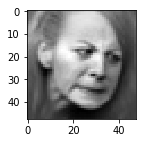

[[58 66 70 ... 51 47 35]
 [62 64 73 ... 59 51 42]
 [66 69 87 ... 58 54 53]
 ...
 [ 8 15 19 ...  5  7  8]
 [ 6 14 17 ...  4  7 10]
 [ 8 15 20 ...  5  7  9]]


In [77]:
import cv2
os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"
base_path = "./images/images/"
pic_size = 48
plt.figure(0, figsize=(2,2))
for i in range(2):  
    plt.imshow(test_X_scaled[0], cmap="gray")
    print(pred_y_label[0])
    break
plt.show() 
print(img)

In [80]:
# get 5 true predictions of "angry" picture
# get 5 false predictions of "angry" picture
true_angry_pic = []
false_angry_pic = []
false_angry_class = []
count = 0
iterate = 0
while count != 10:
    if test_y[iterate] == 0 and test_y[iterate] == pred_y_label[iterate] and len(true_angry_pic) != 5:
        true_angry_pic.append(test_X_scaled[iterate])
        count += 1
    else:
        if test_y[iterate] == 0 and test_y[iterate] != pred_y_label[iterate] and len(false_angry_pic) != 5:
            false_angry_pic.append(test_X_scaled[iterate])
            false_angry_class.append(pred_y_label[iterate])
            count += 1
    iterate += 1

print(false_angry_class)
print(len(true_angry_pic))
print(len(false_angry_pic))

[3, 2, 2, 3, 5]
5
5


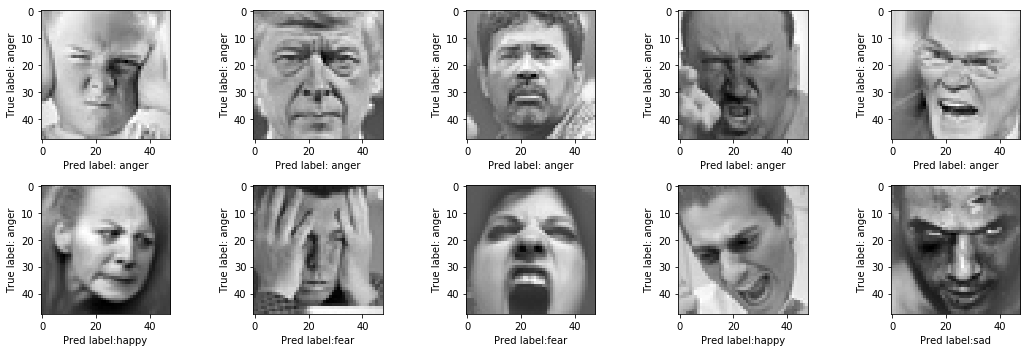

In [82]:
classes = ["angry", "disgust", "fear","happy","neutral","sad","surprise"]
# plot 5 true predictions of "angry" picture
# plot 5 false predictions of "angry" picture

plt.figure(0, figsize=(15,5))
cpt = 0
true_count = 0
false_count = 0
for i in range(2):
    for j in range(5):
        cpt = cpt + 1
        plt.subplot(2,5,cpt)
        plt.ylabel("True label: " + "anger")
        if i == 0:
            plt.xlabel("Pred label: " + "anger")
            plt.imshow(true_angry_pic[true_count], cmap="gray")
            true_count += 1
        else:
            plt.xlabel("Pred label:" + classes[false_angry_class[false_count]])
            plt.imshow(false_angry_pic[false_count], cmap="gray")
            false_count += 1
        

plt.tight_layout()
plt.show() 

In [89]:
# get 4 true predictions of "disgust" picture
# get 5 false predictions of "disgust" picture
# THERE ARE NO 5 TRUE PREDICTIONS FOR DISGUST LOL
true_disgust_pic = []
false_disgust_pic = []
false_disgust_class = []
count = 0
iterate = 0
while count != 9:
    if test_y[iterate] == 1 and test_y[iterate] == pred_y_label[iterate] and len(true_disgust_pic) != 4:
        true_disgust_pic.append(test_X_scaled[iterate])
        count += 1
    else:
        if test_y[iterate] == 1 and test_y[iterate] != pred_y_label[iterate] and len(false_disgust_pic) != 5:
            false_disgust_pic.append(test_X_scaled[iterate])
            false_disgust_class.append(pred_y_label[iterate])
            count += 1
    iterate += 1

print(false_disgust_class)
print(len(true_disgust_pic))
print(len(false_disgust_pic))

[5, 5, 3, 4, 3]
4
5


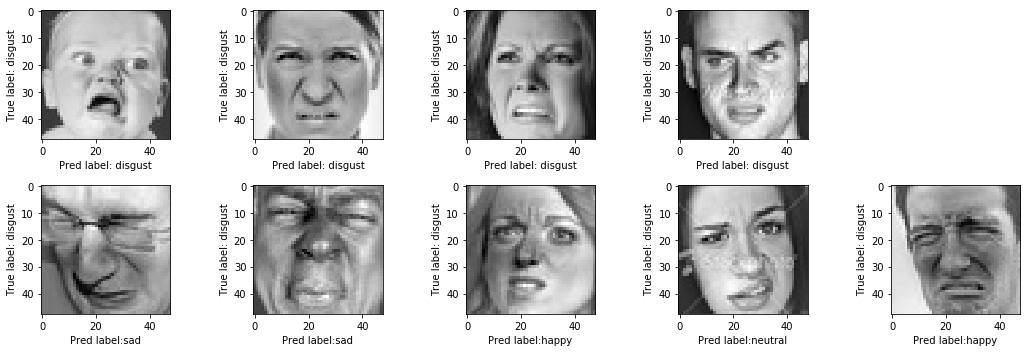

In [94]:
# plot 4 true predictions of "disgust" picture
# plot 5 false predictions of "disgust" picture

plt.figure(0, figsize=(15,5))
cpt = 0
true_count = 0
false_count = 0
for i in range(2):
    for j in range(5):
        cpt = cpt + 1
        
        if i == 0 and true_count != 4:
            plt.subplot(2,5,cpt)
            plt.ylabel("True label: " + "disgust")
            plt.xlabel("Pred label: " + "disgust")
            plt.imshow(true_disgust_pic[true_count], cmap="gray")
            true_count += 1
        elif i == 0 and true_count == 4:
            pass
        elif i == 1:
            plt.subplot(2,5,cpt)
            plt.ylabel("True label: " + "disgust")
            plt.xlabel("Pred label:" + classes[false_disgust_class[false_count]])
            plt.imshow(false_disgust_pic[false_count], cmap="gray")
            false_count += 1
        

plt.tight_layout()
plt.show() 

In [97]:
# get 5 true predictions of "fear" picture
# get 5 false predictions of "fear" picture
true_fear_pic = []
false_fear_pic = []
false_fear_class = []
count = 0
iterate = 0
while count != 10:
    if test_y[iterate] == 2 and test_y[iterate] == pred_y_label[iterate] and len(true_fear_pic) != 5:
        true_fear_pic.append(test_X_scaled[iterate])
        count += 1
    else:
        if test_y[iterate] == 2 and test_y[iterate] != pred_y_label[iterate] and len(false_fear_pic) != 5:
            false_fear_pic.append(test_X_scaled[iterate])
            false_fear_class.append(pred_y_label[iterate])
            count += 1
    iterate += 1

print(false_fear_class)
print(len(true_fear_pic))
print(len(false_fear_pic))

[0, 3, 4, 6, 5]
5
5


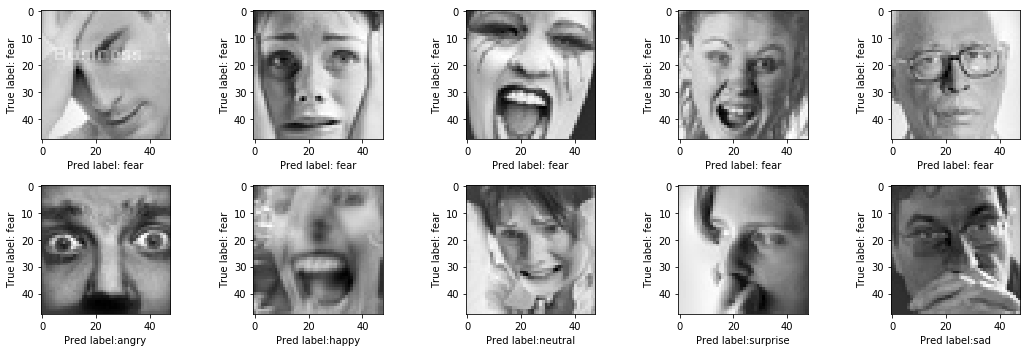

In [98]:
# plot 5 true predictions of "angry" picture
# plot 5 false predictions of "angry" picture

plt.figure(0, figsize=(15,5))
cpt = 0
true_count = 0
false_count = 0
for i in range(2):
    for j in range(5):
        cpt = cpt + 1
        plt.subplot(2,5,cpt)
        plt.ylabel("True label: " + "fear")
        if i == 0:
            plt.xlabel("Pred label: " + "fear")
            plt.imshow(true_fear_pic[true_count], cmap="gray")
            true_count += 1
        else:
            plt.xlabel("Pred label:" + classes[false_fear_class[false_count]])
            plt.imshow(false_fear_pic[false_count], cmap="gray")
            false_count += 1
        

plt.tight_layout()
plt.show() 

In [99]:
# get 5 true predictions of "happy" picture
# get 5 false predictions of "happy" picture
true_happy_pic = []
false_happy_pic = []
false_happy_class = []
count = 0
iterate = 0
while count != 10:
    if test_y[iterate] == 3 and test_y[iterate] == pred_y_label[iterate] and len(true_happy_pic) != 5:
        true_happy_pic.append(test_X_scaled[iterate])
        count += 1
    else:
        if test_y[iterate] == 3 and test_y[iterate] != pred_y_label[iterate] and len(false_happy_pic) != 5:
            false_happy_pic.append(test_X_scaled[iterate])
            false_happy_class.append(pred_y_label[iterate])
            count += 1
    iterate += 1

print(false_happy_class)
print(len(true_happy_pic))
print(len(false_happy_pic))

[5, 4, 4, 4, 4]
5
5


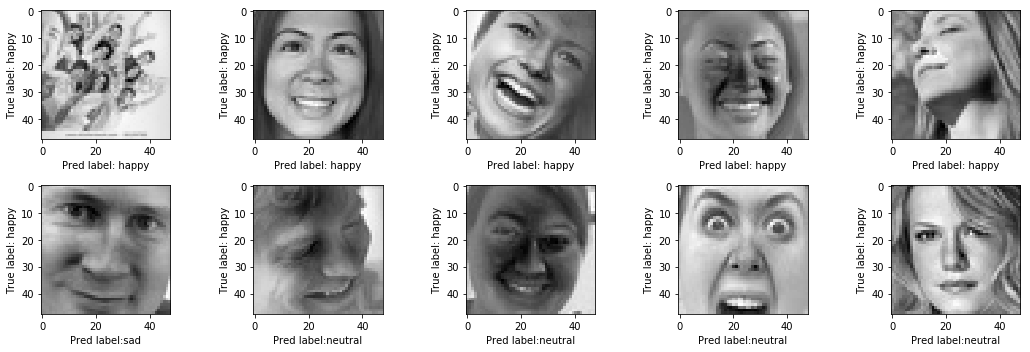

In [100]:
# plot 5 true predictions of "happy" picture
# plot 5 false predictions of "happy" picture

plt.figure(0, figsize=(15,5))
cpt = 0
true_count = 0
false_count = 0
for i in range(2):
    for j in range(5):
        cpt = cpt + 1
        plt.subplot(2,5,cpt)
        plt.ylabel("True label: " + "happy")
        if i == 0:
            plt.xlabel("Pred label: " + "happy")
            plt.imshow(true_happy_pic[true_count], cmap="gray")
            true_count += 1
        else:
            plt.xlabel("Pred label:" + classes[false_happy_class[false_count]])
            plt.imshow(false_happy_pic[false_count], cmap="gray")
            false_count += 1
        

plt.tight_layout()
plt.show() 

In [102]:
# get 5 true predictions of "neutral" picture
# get 5 false predictions of "neutral" picture
true_neutral_pic = []
false_neutral_pic = []
false_neutral_class = []
count = 0
iterate = 0
while count != 10:
    if test_y[iterate] == 4 and test_y[iterate] == pred_y_label[iterate] and len(true_neutral_pic) != 5:
        true_neutral_pic.append(test_X_scaled[iterate])
        count += 1
    else:
        if test_y[iterate] == 4 and test_y[iterate] != pred_y_label[iterate] and len(false_neutral_pic) != 5:
            false_neutral_pic.append(test_X_scaled[iterate])
            false_neutral_class.append(pred_y_label[iterate])
            count += 1
    iterate += 1

print(false_neutral_class)
print(len(true_neutral_pic))
print(len(false_neutral_pic))

[3, 3, 0, 3, 5]
5
5


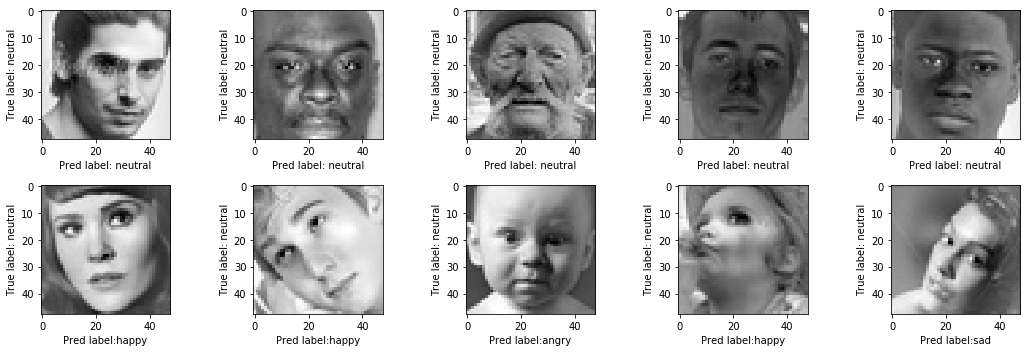

In [103]:
# plot 5 true predictions of "happy" picture
# plot 5 false predictions of "happy" picture

plt.figure(0, figsize=(15,5))
cpt = 0
true_count = 0
false_count = 0
for i in range(2):
    for j in range(5):
        cpt = cpt + 1
        plt.subplot(2,5,cpt)
        plt.ylabel("True label: " + "neutral")
        if i == 0:
            plt.xlabel("Pred label: " + "neutral")
            plt.imshow(true_neutral_pic[true_count], cmap="gray")
            true_count += 1
        else:
            plt.xlabel("Pred label:" + classes[false_neutral_class[false_count]])
            plt.imshow(false_neutral_pic[false_count], cmap="gray")
            false_count += 1
        

plt.tight_layout()
plt.show() 

In [104]:
# get 5 true predictions of "sad" picture
# get 5 false predictions of "sad" picture
true_sad_pic = []
false_sad_pic = []
false_sad_class = []
count = 0
iterate = 0
while count != 10:
    if test_y[iterate] == 5 and test_y[iterate] == pred_y_label[iterate] and len(true_sad_pic) != 5:
        true_sad_pic.append(test_X_scaled[iterate])
        count += 1
    else:
        if test_y[iterate] == 5 and test_y[iterate] != pred_y_label[iterate] and len(false_sad_pic) != 5:
            false_sad_pic.append(test_X_scaled[iterate])
            false_sad_class.append(pred_y_label[iterate])
            count += 1
    iterate += 1

print(false_sad_class)
print(len(true_sad_pic))
print(len(false_sad_pic))

[4, 4, 2, 6, 6]
5
5


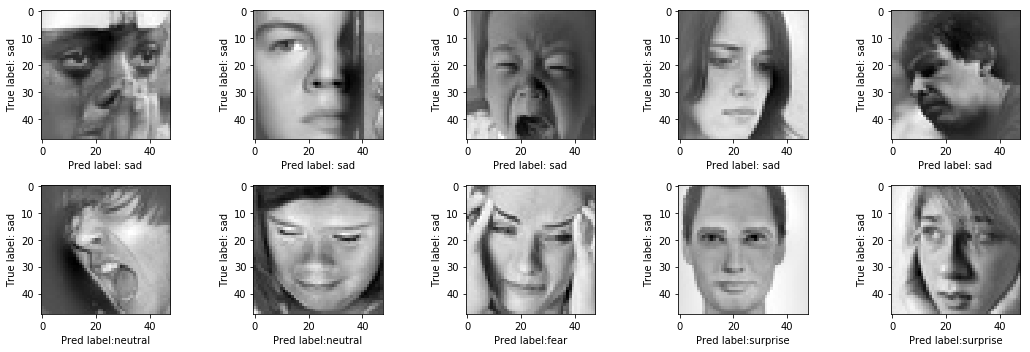

In [105]:
# plot 5 true predictions of "sad" picture
# plot 5 false predictions of "sad" picture

plt.figure(0, figsize=(15,5))
cpt = 0
true_count = 0
false_count = 0
for i in range(2):
    for j in range(5):
        cpt = cpt + 1
        plt.subplot(2,5,cpt)
        plt.ylabel("True label: " + "sad")
        if i == 0:
            plt.xlabel("Pred label: " + "sad")
            plt.imshow(true_sad_pic[true_count], cmap="gray")
            true_count += 1
        else:
            plt.xlabel("Pred label:" + classes[false_sad_class[false_count]])
            plt.imshow(false_sad_pic[false_count], cmap="gray")
            false_count += 1
        

plt.tight_layout()
plt.show() 

In [108]:
# get 5 true predictions of "surprise" picture
# get 5 false predictions of "surprise" picture
true_surprise_pic = []
false_surprise_pic = []
false_surprise_class = []
count = 0
iterate = 0
while count != 10:
    if test_y[iterate] == 6 and test_y[iterate] == pred_y_label[iterate] and len(true_surprise_pic) != 5:
        true_surprise_pic.append(test_X_scaled[iterate])
        count += 1
    else:
        if test_y[iterate] == 6 and test_y[iterate] != pred_y_label[iterate] and len(false_surprise_pic) != 5:
            false_surprise_pic.append(test_X_scaled[iterate])
            false_surprise_class.append(pred_y_label[iterate])
            count += 1
    iterate += 1

print(false_surprise_class)
print(len(true_surprise_pic))
print(len(false_surprise_pic))

[5, 3, 5, 4, 5]
5
5


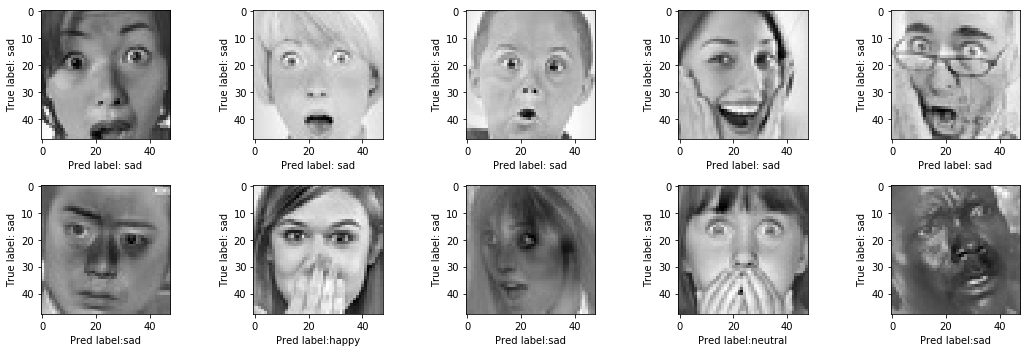

In [109]:
# plot 5 true predictions of "surprise" picture
# plot 5 false predictions of "surprise" picture

plt.figure(0, figsize=(15,5))
cpt = 0
true_count = 0
false_count = 0
for i in range(2):
    for j in range(5):
        cpt = cpt + 1
        plt.subplot(2,5,cpt)
        plt.ylabel("True label: " + "sad")
        if i == 0:
            plt.xlabel("Pred label: " + "sad")
            plt.imshow(true_surprise_pic[true_count], cmap="gray")
            true_count += 1
        else:
            plt.xlabel("Pred label:" + classes[false_surprise_class[false_count]])
            plt.imshow(false_surprise_pic[false_count], cmap="gray")
            false_count += 1
        

plt.tight_layout()
plt.show() 